# Support Vector Machnes (SVM) decoding and surrogates

<div class="warning" style='padding:0.5em;background-color:#f1f1f1;border:1px solid black;width:95%'>

Lesson time: 60 m   
Contributors: Bryan Souza, Davide Spalla

---
### In this lesson you will learn:
- How to train a Support Vector Machine (SVM) to decode the presence of absence of a stimulus from neural activity 
- What the bias and variance of a classifier are
- How to assess the performance of a classifier using shuffling methods to create surrogate data

</div>


## Introduction
---
In this lesson we will look at Support Vector Machines, a widely used group of classification algorithms, and how they can be used to decode the identity of a presented stimulus from the patterns of neural activity.

## Support Vector Machines (SVMs)
---
The SVM is a machine learning algorithm that learns to predict to which of differen classes each data points belong.  
To get some intuition about the algorithms, we will start with the case of the *linear SVM*  with two classes

**Linear SVM**  
Let our data consist of $N$ pairs $(x_{i},y_{i})$ with our set of features $x_{i} \in R^{P}$ and the class labels $y_{i} \in \{-1,1\}$.
First, let's imagine that our data is linearly separable, like in the image below  
IMAGE
In this case, we can draw a hyperplane (the *decision boundary*) that perfectly separates the two classes in many different ways. 
We look for the linear decision bounday

$$x^{T}w+b=0$$

such that the **margin** $M$ between the two classes is maximal.
To do so, we want to find the largest $M$ such that, for every data point in our set, the *signed distance* from the boundary $y_{i}(x_{i}^{T}w+b) is larger than $M$.
This amounts to solve the following maximization problem:

$$max_{w,b,||w||=1} M$$
with constraints:
$$y_{i}(x_{i}^{T}w+b) \geq M\; \forall i$$


**Non-separable data**  
If the data are not linearly separable, such as in the example below, the margin problem does not have a solution.  
IMAGE  
However, we can soften our margin constraint by introducting a new set of $N$ variables $\xi_{i}$, often called *slacks*, to quantify by how much our margin constraint is violated.  
We can then require 
$$y_{i}(x_{i}^{T}w+b) \geq M(1-\xi_{i})\; \forall i$$
with:
$$\xi_{i}\geq 0 ,\: \sum_{\xi_{i}} \leq K$$

$K$ quantifies the total amount of slack that we want to allow to our system: a larger $K$ allows for more margin violation, a lower $K$ enforces the margin more striclty.  
You can think of $\xi_{i}$ as the *relative* amount of margin violation for point $i$.
Note that each $\xi_{i}>1$ corresponds to a misclassification of the corresponding data point.  
If we drop the norm constraint on $w$ and define $M=1/||w||$, we obtain the following minimization problem:

$$min ||w||$$
with contraints:
$$y_{i}(x_{i}^{T}w+b) \geq (1-\xi_{i})$$
$$\xi_{i}\geq 0 \; \forall i,\: \sum_{\xi_{i}} \leq K$$



The optimization problems we encountered are quadratic with linear constraint, which makes them convex optimization problem.
The soultion procedure is beyound the scope of this lesson, but if you are interested you can find more in Chapter 12 of [The elements of statistical learning](https://hastie.su.domains/ElemStatLearn/#:~:text=Elements%20of%20Statistical%20Learning%3A%20data%20mining%2C%20inference%2C%20and%20prediction.) (free pdf available at the link).  
In our lesson we will use the [sklearn](https://scikit-learn.org/stable/modules/svm.html) implementation of support vector machines.
Let's look at a minimal example, before moving to some neuroscience.












### Note box: Bias-Variance decomposition

### Example: support vector machine

### Example: decoding the stimulus identity from neural activity
---

In [52]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import data
with open('data/simulated_data1.pickle', 'rb') as handle:
    data = pickle.load(handle)

spike_times = data['spike_times']
stim_onsets = data['stim_onsets']
stim_type = data['stim_type']
stim_duration = data['stim_duration']


We bin the data in 100 ms wide bin, around the presentation of each stimulus

In [9]:
onset = -1 # in seconds before stimulus onset
offset = 1 # in second after stimulus offset

binwidth = 0.1 # in seconds (100 ms)
bins = np.arange(onset,stim_duration+offset+binwidth,binwidth)


In [39]:
onset = 1 # in seconds before stimulus onset
offset = 1 # in second after stimulus offset

binwidth = 0.1 # in seconds (100 ms)
bins = np.arange(-onset,stim_duration+offset+binwidth,binwidth)

n_cells = len(spike_times)
n_trials= len(stim_type)

X = np.zeros((n_cells,n_trials,len(bins)-1));
for cell in range(n_cells):    
    for trial in range(n_trials):

        # selects spikes that are in trial
        sp_idx = np.logical_and(spike_times[cell]>stim_onsets[trial]-onset,
                 spike_times[cell]<stim_onsets[trial]+stim_duration+offset)
        
        # centers spike times around stimulus onset
        sp_cntr = spike_times[cell][sp_idx]-stim_onsets[trial]
        #bins spikes
        spike_count,_ = np.histogram(sp_cntr,bins)
        X[cell,trial,:] = spike_count


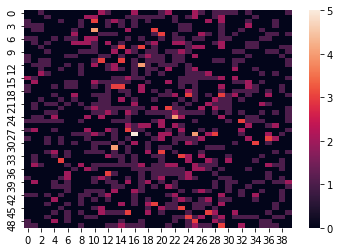

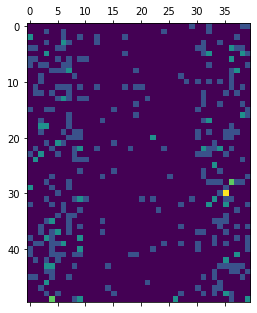

In [59]:
sns.heatmap(X[3][stim_type==1])
plt.matshow(X[3][stim_type==2])


In [70]:
from sklearn.model_selection import KFold
from sklearn import svm


performance = []
for time_bin in range(X.shape[-1]):
        # setting 2-fold cross validation
        kf = KFold(n_splits=2)
        KFold(n_splits=2, random_state=None, shuffle=False)
        fold_performance = []
        for train_index, test_index in kf.split(stim_type):

                X_train, X_test = X[:,train_index,time_bin].T, X[:,test_index,time_bin].T
                y_train, y_test = stim_type[train_index], stim_type[test_index]

                clf = svm.SVC()
                clf.fit(X_train, y_train)
                fold_performance.append(clf.score(X_test,y_test))

        performance.append(np.mean(fold_performance))



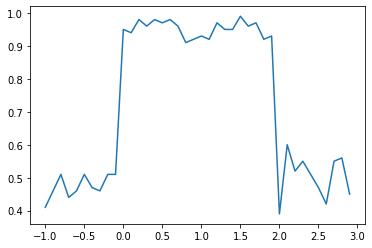

In [73]:
plt.plot(bins[:-1],performance)

## Assessing significance with surrogate data
---


### Example: computing significance on decoding performance
---

### Note box: Linear classifier for neural data

- SVM, logistic regression, LDA
- Interpretation of classifier components, collective activity

<div class="warning" style='padding:0.5em; background-color:#f1f1f1;border:1px solid black;width:95%'>

### Key points 


<div class="warning" style='padding:0.5em; background-color:#f1f1f1;border:1px solid black;width:95%'>

### References and resources

**Books & papers**

**Websites & blogposts**

**Software**




## Exercises
You can find the exercises for this lessons in [exercises.ipynb](./exercises.ipynb)